In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
test=pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train["datetime"]=train["datetime"].astype("datetime64")
test["datetime"]=test["datetime"].astype("datetime64")

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train["hour"]=train["datetime"].dt.hour
test["hour"]=test["datetime"].dt.hour
train["year"]=train["datetime"].dt.year
test["year"]=test["datetime"].dt.year
train["dayofweek"]=train["datetime"].dt.weekday
test["dayofweek"]=test["datetime"].dt.weekday

In [8]:
train.groupby("hour")["count"].mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

In [9]:
train.groupby("hour")["count"].median()

hour
0      41.0
1      19.0
2      11.0
3       6.0
4       6.0
5      19.0
6      75.0
7     208.0
8     392.0
9     217.0
10    149.0
11    183.0
12    234.5
13    226.5
14    212.0
15    232.0
16    309.5
17    480.5
18    422.5
19    312.5
20    224.0
21    171.5
22    129.0
23     80.0
Name: count, dtype: float64

In [10]:
weekend=train[train["workingday"]==0]
weekday=train[train["workingday"]==1]

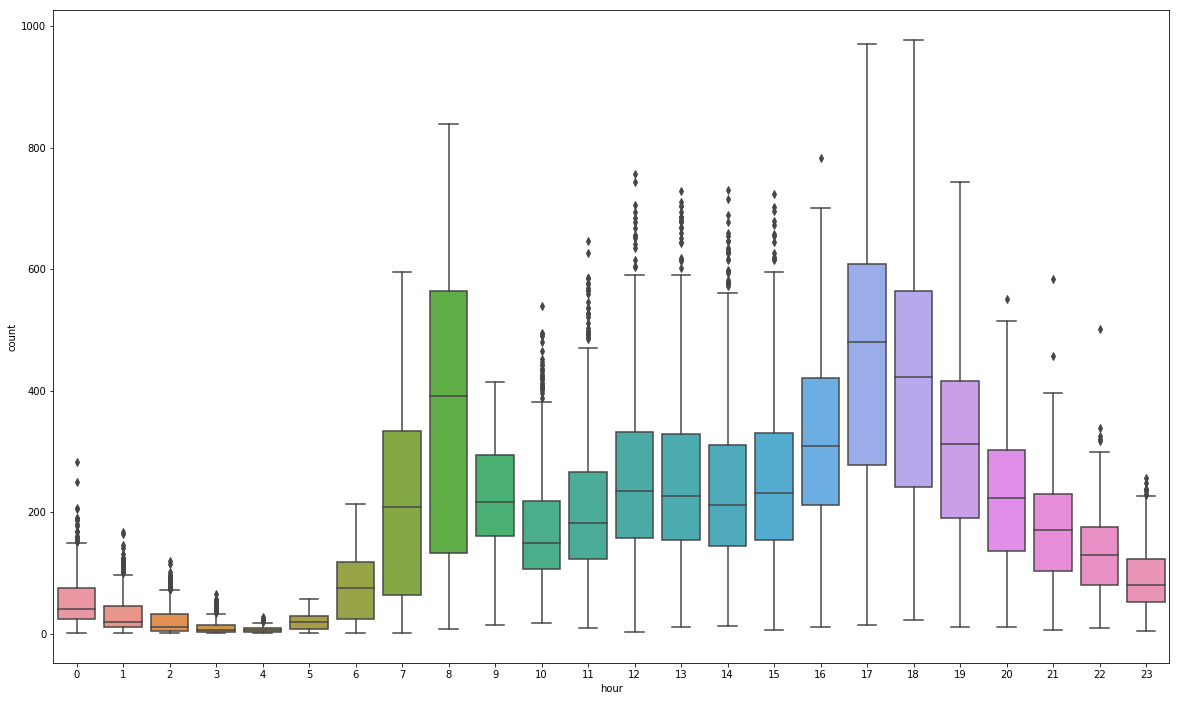

In [11]:
cherry, strawberry = plt.subplots(1,1,figsize=(20,12))
sns.boxplot(train["hour"],train["count"])

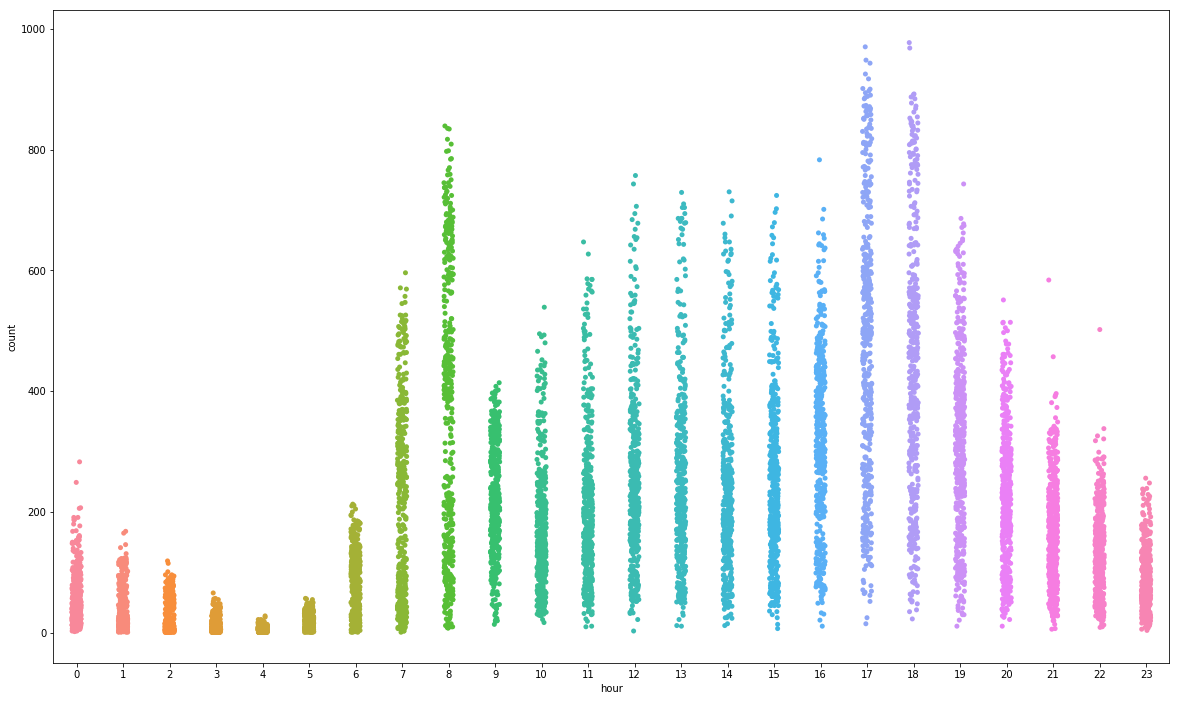

In [12]:
cherry, strawberry = plt.subplots(1,1,figsize=(20,12))
sns.stripplot(train["hour"],train["count"])

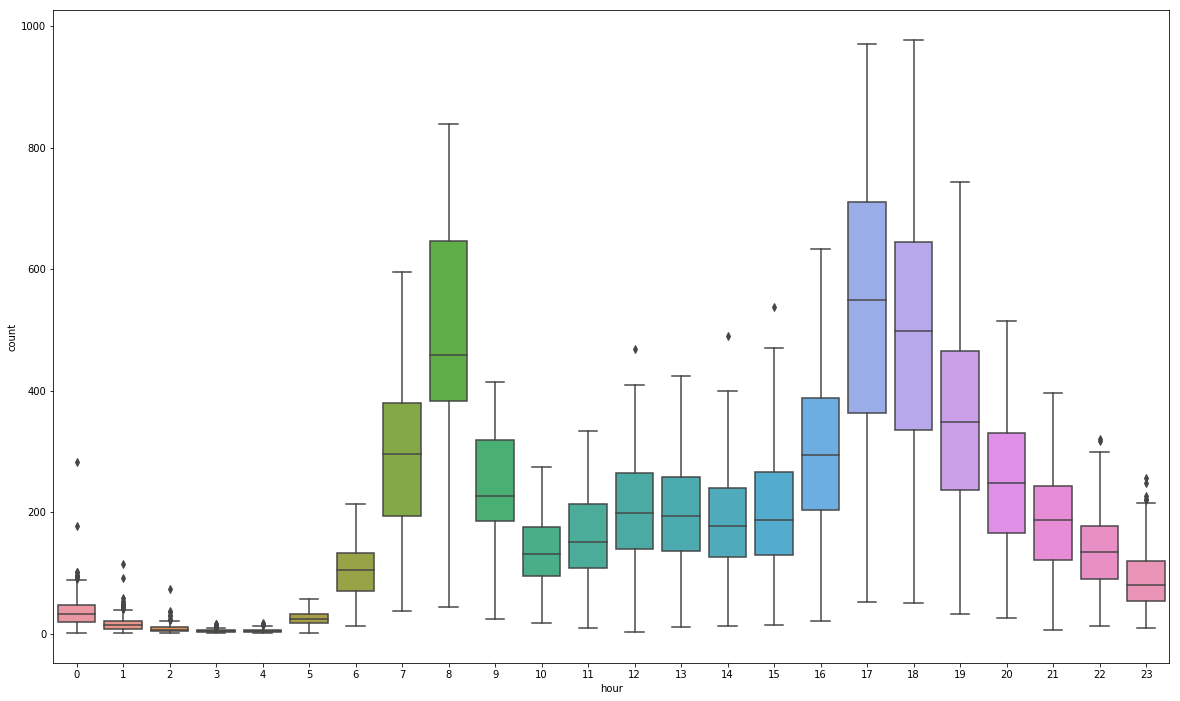

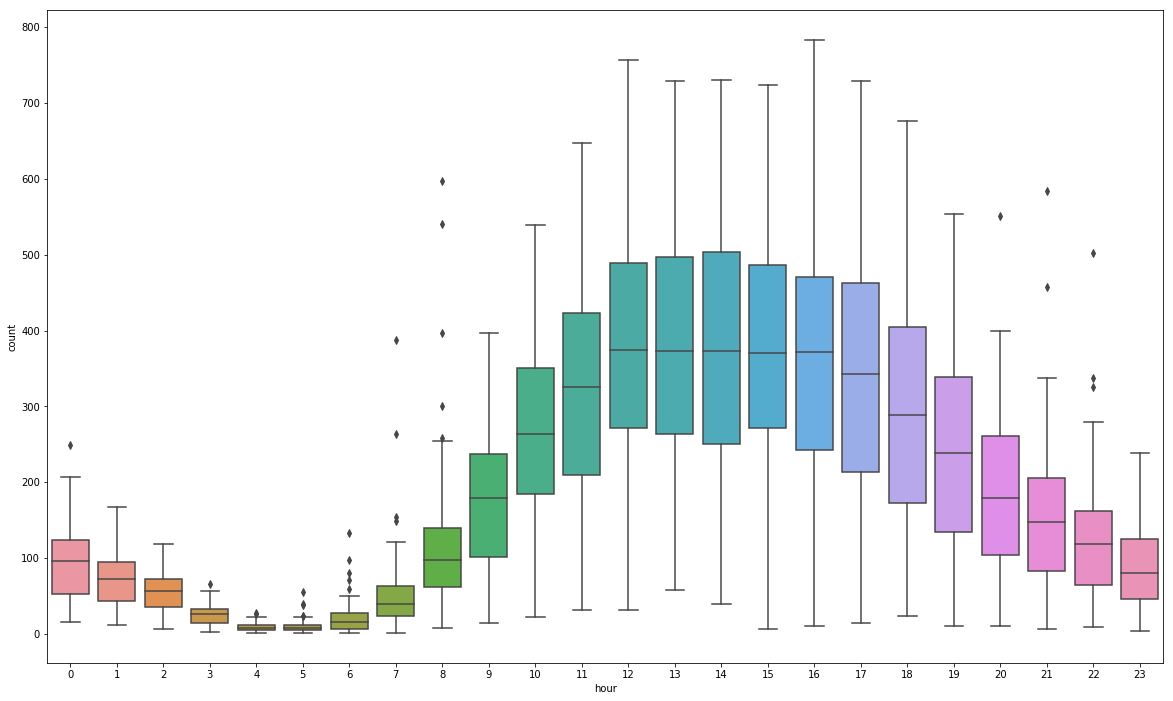

In [13]:
cherry_weekday, strawberry_weekday = plt.subplots(1,1,figsize=(20,12))
sns.boxplot(weekday["hour"],weekday["count"])

cherry_weekend, strawberry_weekend = plt.subplots(1,1,figsize=(20,12))
sns.boxplot(weekend["hour"],weekend["count"])

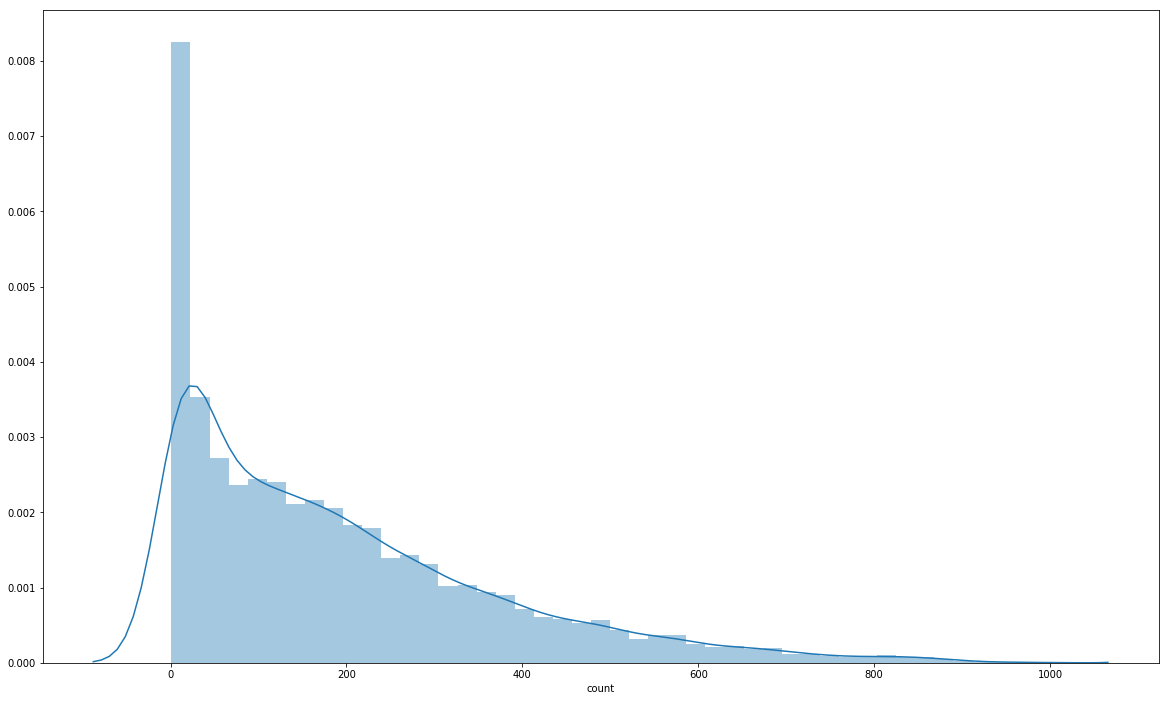

In [14]:
cherry, strawberry = plt.subplots(1,1,figsize=(20,12))
sns.distplot(train["count"])

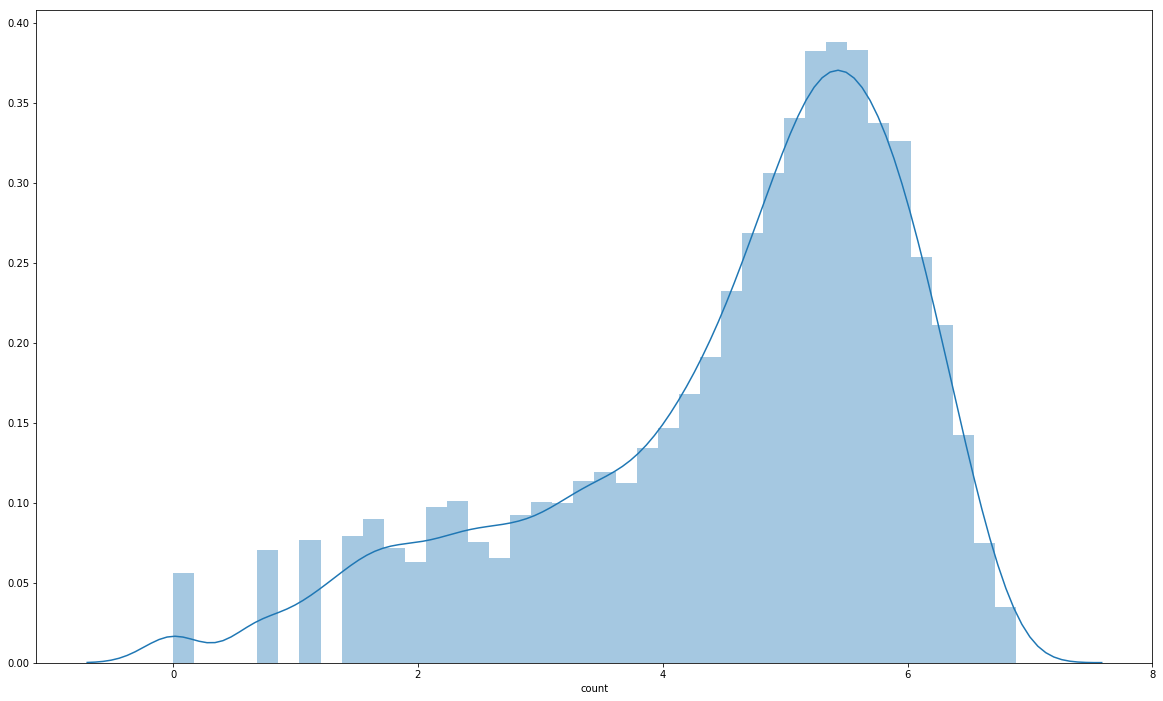

In [15]:
cherry, strawberry = plt.subplots(1,1,figsize=(20,12))
sns.distplot(np.log(train["count"]))

In [16]:
# cherry, strawberry = plt.subplots(1,1,figsize=(20,12))
# sns.swarmplot(train["hour"],train["count"])

In [17]:
# cherry, strawberry = plt.subplots(1,1,figsize=(20,12))
# sns.stripplot(train["hour"],train["count"])

In [18]:
train.groupby("year")["count"].mean()

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

In [19]:
train.groupby("year")["count"].median()

year
2011    111
2012    199
Name: count, dtype: int64

In [20]:
train["year"].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

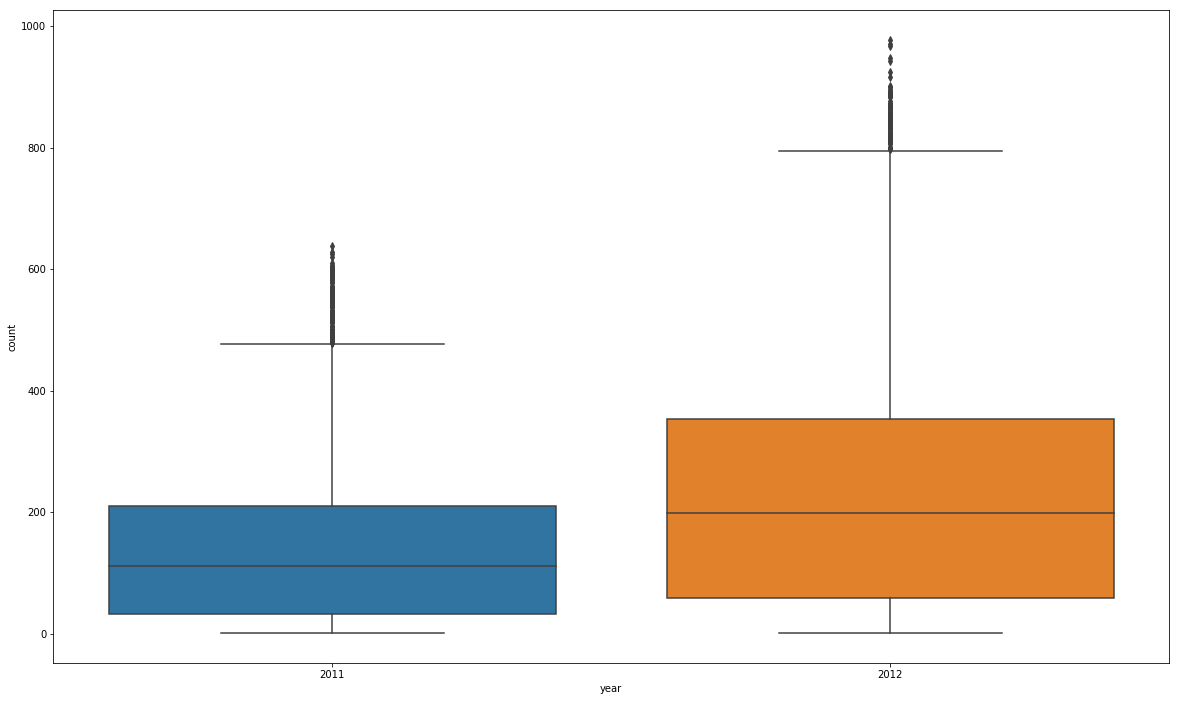

In [21]:
cherry, strawberry = plt.subplots(1,1,figsize=(20,12))
sns.boxplot(train["year"],train["count"])

In [22]:
# train["month"]=train["datetime"].dt.month
# test["month"]=test["datetime"].dt.month
# train["day"]=train["datetime"].dt.day
# test["day"]=test["datetime"].dt.day

In [23]:
# train.groupby("month")["count"].median()

In [24]:
# train.groupby("month")["count"].mean()

In [25]:
# cherry, strawberry = plt.subplots(1,1,figsize=(20,12))
# sns.boxplot(train["month"],train["count"])

In [26]:
# train.groupby("day")["count"].mean()

In [27]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3


In [28]:
# test["day"].unique()

In [29]:
test.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,dayofweek
season,1.000000,-0.075759,0.051488,-0.053554,0.401384,0.410626,0.083792,-0.154507,-0.005367,-0.020916,-0.002133
holiday,-0.075759,1.000000,-0.255820,-0.033279,-0.071852,-0.072373,-0.031611,-0.003240,0.001860,-0.002170,-0.184079
workingday,0.051488,-0.255820,1.000000,0.062447,0.096519,0.103202,0.059599,-0.053690,0.001438,-0.001736,-0.699302
weather,-0.053554,-0.033279,0.062447,1.000000,-0.179034,-0.185746,0.437406,0.057360,-0.016085,-0.030057,-0.044301
temp,0.401384,-0.071852,0.096519,-0.179034,1.000000,0.991936,-0.081734,-0.030990,0.125005,0.007931,-0.032509
atemp,0.410626,-0.072373,0.103202,-0.185746,0.991936,1.000000,-0.068666,-0.069655,0.123154,0.007918,-0.036735
humidity,0.083792,-0.031611,0.059599,0.437406,-0.081734,-0.068666,1.000000,-0.242708,-0.275278,-0.092408,-0.049784
windspeed,-0.154507,-0.003240,-0.053690,0.057360,-0.030990,-0.069655,-0.242708,1.000000,0.121729,0.002057,0.049981
hour,-0.005367,0.001860,0.001438,-0.016085,0.125005,0.123154,-0.275278,0.121729,1.000000,-0.003256,-0.002834
year,-0.020916,-0.002170,-0.001736,-0.030057,0.007931,0.007918,-0.092408,0.002057,-0.003256,1.000000,0.008995


In [30]:
test["day"].value_counts()

KeyError: 'day'

In [31]:
train.groupby("day")["count"].median()

KeyError: 'day'

KeyError: 'day'

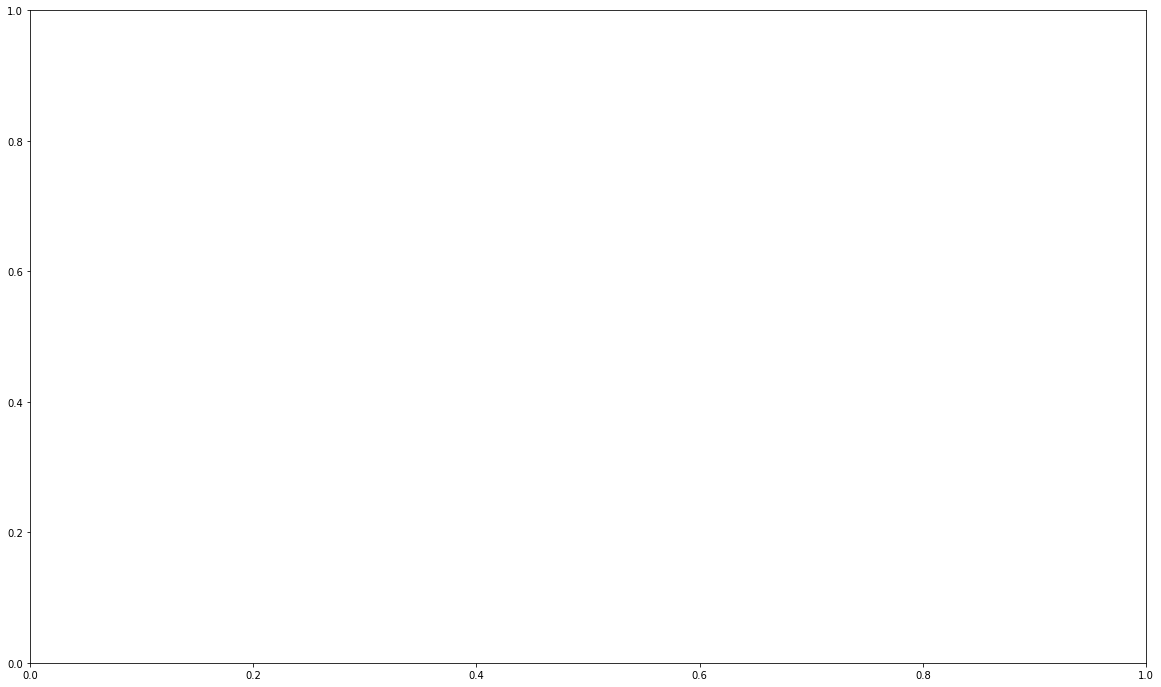

In [32]:
cherry, strawberry = plt.subplots(1,1,figsize=(20,12))
sns.boxplot(train["day"],train["count"])

In [33]:
y=train["count"]

In [34]:
train=train.drop(["casual","registered","count","datetime"],axis=1)
test=test.drop("datetime",axis=1)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
# rf=RandomForestRegressor(n_estimators=100)

In [37]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()

In [38]:
lgb.fit(train,np.log(y))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [39]:
# rf.fit(train,np.log(y))

In [40]:
rf.feature_importances_
feature_importances = pd.DataFrame(rf.feature_importances_).rename({0:"importance"},axis=1)
feature_importances["columns"]=train.columns
feature_importances=feature_importances.sort_values("importance",ascending=False)
feature_importances.head(15)

NameError: name 'rf' is not defined

NameError: name 'feature_importances' is not defined

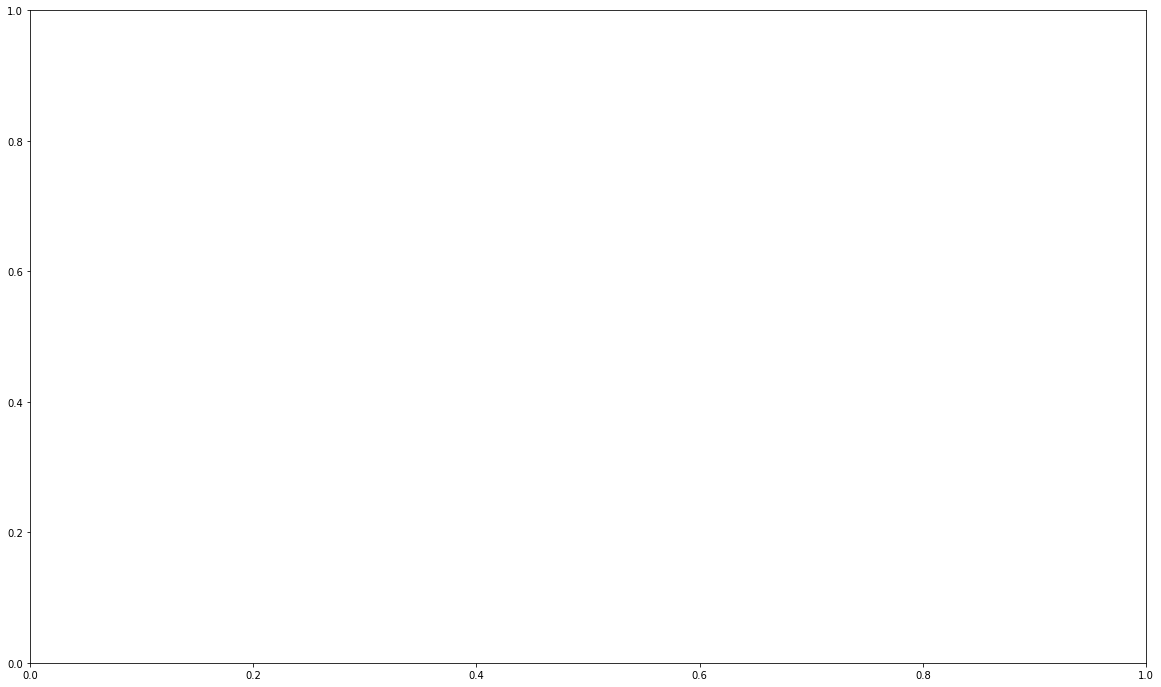

In [41]:
jin, macarrong = plt.subplots(1,1,figsize=(20,12))
sns.barplot(feature_importances["importance"],feature_importances["columns"])

In [42]:
result=np.exp(lgb.predict(test))

In [43]:
# result=np.exp(rf.predict(test))

In [44]:
samplesubmission = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv")
samplesubmission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [45]:
samplesubmission["count"]=result
samplesubmission.head()

,datetime,count
0,2011-01-20 00:00:00,10.230455
1,2011-01-20 01:00:00,4.962407
2,2011-01-20 02:00:00,2.955541
3,2011-01-20 03:00:00,2.062522
4,2011-01-20 04:00:00,1.767986


In [46]:
samplesubmission.to_csv("secondclass.csv", index=False)